In [1]:
#!pip install -i https://test.pypi.org/simple/ brown-edu-dmtools==0.1.10

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ast
## plt.rcParams['text.usetex'] = True

In [3]:
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import DMToolsClient
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import DMToolTestData
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import PlotTrace

In [4]:
## get api key and user id from local .env file
from dotenv import load_dotenv
import os
from os import environ, path
#BASE_DIR = path.abspath(path.dirname(__file__))
BASE_DIR = os.getcwd()
#load_dotenv(path.join(BASE_DIR, ".env"))
load_dotenv(path.join(BASE_DIR, ".env"), override=True)
MY_DMTOOLS_APIKEY = environ.get("MY_DMTOOLS_APIKEY")
MY_DMTOOLS_USERID = environ.get("MY_DMTOOLS_USERID")
Client = DMToolsClient(MY_DMTOOLS_USERID, MY_DMTOOLS_APIKEY)
#Client.request_header

In [5]:
r = Client.read()
#r

In [6]:
for rl in range(0,len(r)):
    string_data = r[rl]['data']
    data_id = r[rl]['id']

    # Convert the string to a Python list
    list_data = ast.literal_eval(string_data)
    
    # Convert the Python list to a NumPy array
    #numpy_array = np.array(list_data)
    
    #print(data_id, "shape >>> ", len(list_data))
    

In [7]:
subject = 'data'
r = Client.read(id=9)
r

[{'id': 9,
  'limit_id': 9,
  'subject': 'data',
  'spin_dependency': 'SD',
  'result_type': 'Th',
  'measurement_type': 'Dir',
  'x_units': 'GeV',
  'y_units': 'cm^2',
  'x_rescale': '1',
  'y_rescale': '1e-36',
  'default_color': 'DkG',
  'default_style': 'Fill',
  'data_values': '{[73.88957 0.001911593;118.5556 0.0004089102;151.5996 0.0003062291;174.7028 0.0002220811;203.2395 0.0001131067;201.3267 7.213392e-05;173.0585 9.327547e-05;137.921 0.0001773525;112.0163 0.0002445525;83.55477 0.0004958483;78.20307 0.0008561663;65.3424 0.001005369;73.88957 0.001911593],[77.46705 3.917629e-05;87.60021 1.543022e-05;98.12653 1.543022e-05;103.8549 1.995262e-05;179.7298 2.3937e-06;203.2395 1.911593e-06;234.2124 1.30003e-06;382.9678 1.416325e-07;523.2218 6.142881e-08;597.2837 2.197154e-08;523.2218 1.494234e-08;311.0378 2.580049e-08;293.8817 1.932175e-08;181.4374 5.578425e-08;155.9619 1.328177e-07;126.6687 1.462569e-07;98.12653 3.482254e-07;70.4773 1.735941e-06;67.22261 3.300689e-06;60.01145 3.634671

In [8]:
trace_color = r[0]['default_color']
trace_style = r[0]['default_style']

In [9]:
pt = PlotTrace()

In [10]:
trace_color_clean = pt.clean_the_color_in(trace_color)
trace_color_clean

'green'

In [11]:
pt.set_values(trace_color, trace_style)
print(pt.mode,pt.line,pt.marker,pt.fillcolor,pt.opacity,pt.fill)

lines {'color': 'green', 'width': 1, 'dash': 'solid'} {'symbol': 'x'} None 1 toself


In [12]:
# Example string that represents a list of lists of lists
string_data = r[0]['data']

# Convert the string to a Python list
list_data = ast.literal_eval(string_data)

len(list_data)

2

In [13]:
# Convert the Python list to a NumPy array
numpy_array = np.array(list_data[0])

print(numpy_array)

[[7.38896e+01 1.91159e-03]
 [1.18556e+02 4.08910e-04]
 [1.51600e+02 3.06229e-04]
 [1.74703e+02 2.22081e-04]
 [2.03239e+02 1.13107e-04]
 [2.01327e+02 7.21339e-05]
 [1.73059e+02 9.32755e-05]
 [1.37921e+02 1.77353e-04]
 [1.12016e+02 2.44552e-04]
 [8.35548e+01 4.95848e-04]
 [7.82031e+01 8.56166e-04]
 [6.53424e+01 1.00537e-03]
 [7.38896e+01 1.91159e-03]]


In [14]:
#transposed_array = numpy_array.T
#x = transposed_array[0]
#y = transposed_array[1]
#print(x.shape, y.shape)
# (1, 30, 2)
numpy_array

x = numpy_array[:, 0]
y = numpy_array[:, 1]

y

array([1.91159e-03, 4.08910e-04, 3.06229e-04, 2.22081e-04, 1.13107e-04,
       7.21339e-05, 9.32755e-05, 1.77353e-04, 2.44552e-04, 4.95848e-04,
       8.56166e-04, 1.00537e-03, 1.91159e-03])

In [15]:
trace_count = len(list_data)
trace_names_int = list(range(1,trace_count+1))
trace_names_int
trace_names = []
for t in trace_names_int:
    trace_names.append(str(t))
trace_names   

['1', '2']

In [16]:
x

array([ 73.8896, 118.556 , 151.6   , 174.703 , 203.239 , 201.327 ,
       173.059 , 137.921 , 112.016 ,  83.5548,  78.2031,  65.3424,
        73.8896])

In [17]:
y

array([1.91159e-03, 4.08910e-04, 3.06229e-04, 2.22081e-04, 1.13107e-04,
       7.21339e-05, 9.32755e-05, 1.77353e-04, 2.44552e-04, 4.95848e-04,
       8.56166e-04, 1.00537e-03, 1.91159e-03])

In [18]:
for xil in list_data[0]:
    print(xil[0], xil[1])

73.8896 0.00191159
118.556 0.00040891
151.6 0.000306229
174.703 0.000222081
203.239 0.000113107
201.327 7.21339e-05
173.059 9.32755e-05
137.921 0.000177353
112.016 0.000244552
83.5548 0.000495848
78.2031 0.000856166
65.3424 0.00100537
73.8896 0.00191159


In [19]:
#x = [item[0] for item in list_data[1]]
#y = [item[1] for item in list_data[1]]
#print(y)

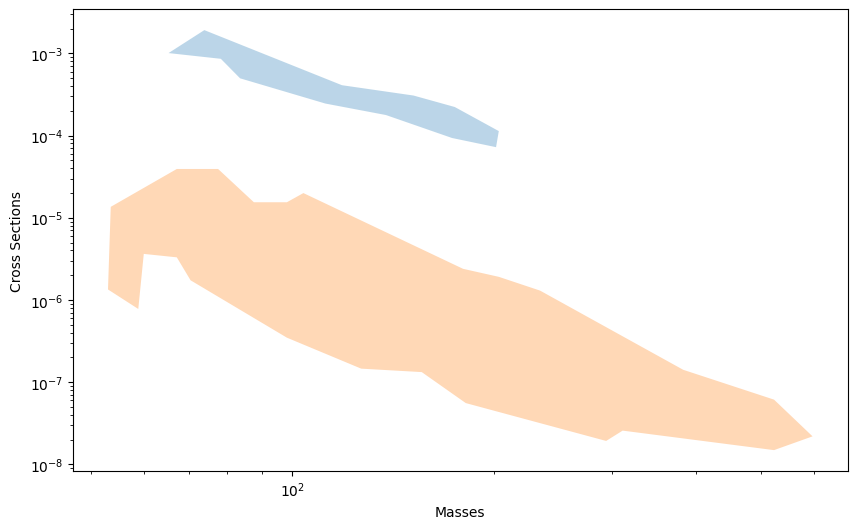

In [20]:
# Now you can plot these two lists using matplotlib
plt.figure(figsize=(10, 6))


for tl in range(0,trace_count):
    # Plot the first list as a line
    #list_data[tl]
    '''
    numpy_array = np.array(list_data[tl])
    x = numpy_array[:, 0]
    y = numpy_array[:, 1]
    '''
    x = [item[0] for item in list_data[tl]]
    y = [item[1] for item in list_data[tl]]
    
    if pt.fill != 'toself':
        plt.plot(x, y, label=str(tl))
    else:
        plt.fill_between(x, y, alpha=0.3, label='Area Trace')


# Add labels and title
plt.xlabel('Masses')
plt.ylabel('Cross Sections')


#plt.title('Two Lists of Lists Plotted')
plt.xscale('log')
plt.yscale('log')

# Show legend
#plt.legend()

# Show plot
plt.show()

In [21]:
'''

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot
plt.plot(x, y)

# Add a title and labels using mathtext
plt.title(r'This is a $\sin(x)$ function', fontsize=16)  # LaTeX-like syntax
plt.xlabel(r'$\theta$ (radians)', fontsize=14)           # LaTeX-like syntax
plt.ylabel(r'$\sin(\theta)$', fontsize=14)               # LaTeX-like syntax

# Display the plot
plt.show()
'''

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6851/2025010216.py:1: SyntaxWarning: invalid escape sequence '\s'
  '''


"\n\n# Sample data\nx = np.linspace(0, 10, 100)\ny = np.sin(x)\n\n# Create the plot\nplt.plot(x, y)\n\n# Add a title and labels using mathtext\nplt.title(r'This is a $\\sin(x)$ function', fontsize=16)  # LaTeX-like syntax\nplt.xlabel(r'$\theta$ (radians)', fontsize=14)           # LaTeX-like syntax\nplt.ylabel(r'$\\sin(\theta)$', fontsize=14)               # LaTeX-like syntax\n\n# Display the plot\nplt.show()\n"

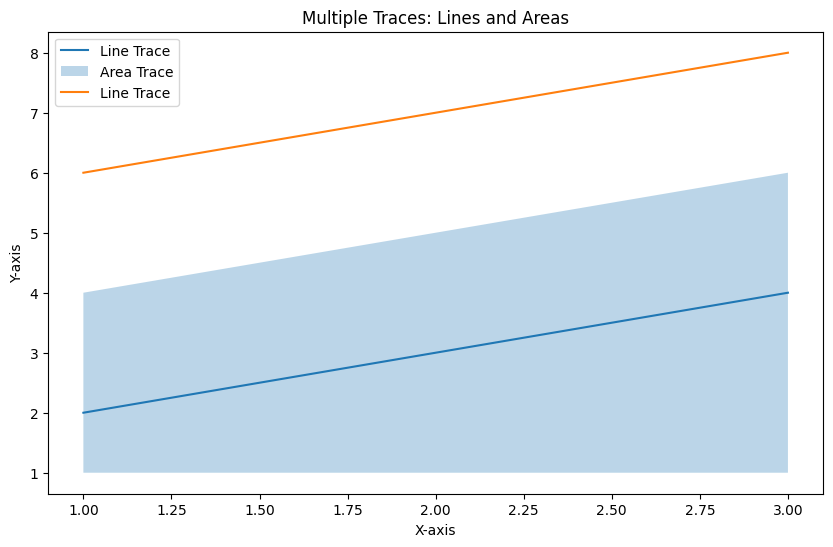

In [22]:


# Example data structure: list of list of lists
# Assuming the structure: [[[x_values_line], [y_values_line]], [[x_values_area], [y1_values_area], [y2_values_area]]]
traces = [
    [[1, 2, 3], [2, 3, 4]],        # Line trace
    [[1, 2, 3], [4, 5, 6], [1, 1, 1]],  # Area trace (with y2 values)
    [[1, 2, 3], [6, 7, 8]]         # Line trace
]

# Create a plot
plt.figure(figsize=(10, 6))

# Iterate over traces and plot accordingly
for trace in traces:
    x_values = trace[0]
    y_values = trace[1]
    
    if len(trace) == 2:  # Line trace
        plt.plot(x_values, y_values, label='Line Trace')
    elif len(trace) == 3:  # Area trace
        y2_values = trace[2]
        plt.fill_between(x_values, y_values, y2_values, alpha=0.3, label='Area Trace')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multiple Traces: Lines and Areas')

# Show legend
plt.legend()

# Show plot
plt.show()